In [384]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [385]:

X, _ = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  random_state=42)

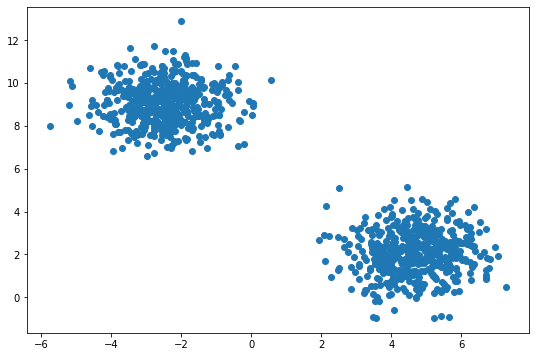

In [386]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [771]:
import warnings
warnings.filterwarnings("ignore", "Mean of empty slice")

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2)) 

class KMeans:
    
    def __init__(self, k, max_iter=10, random_state=42):
        self.k = k
        self.max_iter = max_iter
        
    def fit_predict(self, x):
        # randomly initialize centroids in shape (k, x.shape[1])
        self.centroids = x[np.random.choice(x.shape[1], size=self.k , replace=True), :]
        done = False
        
        prev_centroids = self.centroids 
        
        for i in range(self.max_iter):
            # calculate distances for each point to each centroid
            dists = np.zeros((x.shape[0], prev_centroids.shape[0])) # zero matrix
            for i,point in enumerate(x):
                for j,centr in enumerate(prev_centroids):
                    dists[i][j] = euclidean_distance(point, centr)  
           
            
               
            # find closest centroid to each point
            labels = np.argmin(dists, axis=1) # indexes 
            
            
                  
            # for each centroid recalculate centroid coordinates as mean of its cluster
            new_centroids = np.array([x[labels == k].mean(axis=0) for k in range(self.k)])  
           
              
            # if prev centroids are same as new centroids: done
            if np.allclose(prev_centroids, new_centroids):
                break
                
            # find dists for new centroids
            dists = np.zeros((x.shape[0], prev_centroids.shape[0])) 
            for i, point in enumerate(x):
                for j,centr in enumerate(new_centroids):
                    dists[i][j] = euclidean_distance(point, centr) 
            
            labels = np.argmin(dists, axis=1)
            return labels

In [772]:
# Проведите поиск гиперпараметра с помощью Silluhete score

In [773]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [779]:
def compute_silhouette_score(n_clusters):
    for n in range(2, n_clusters):
        model = KMeans(k=n)
        prediction = model.fit_predict(X)
        s_score = silhouette_score(X, prediction,  metric='euclidean')
        print("Silhouette score is {} for {} clusters".format(s_score, n))

In [783]:
compute_silhouette_score(3) 

Silhouette score is 0.8252458901491531 for 2 clusters


In [777]:
model = KMeans(2)
model.fit_predict(X)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,